<a href="https://colab.research.google.com/github/sidhu2690/PyTorchNotes/blob/main/Torch_Geometric_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is Torch-Geometric(or PyG)?
Graphs are everywhere—think social networks (nodes are people, edges are friendships), molecular structures (nodes are atoms, edges are bonds), or citation networks (nodes are papers, edges are citations). Torch-Geometric([doc](https://pytorch-geometric.readthedocs.io/en/latest/)) makes it easy to apply deep learning techniques to these structures.

For this introduction, we’ll focus on node classification, where the goal is to predict a label for each node in a graph (e.g., classifying people into communities in a social network).

You can install the torch-geometric library from PyPI using pip.

In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00


## What is a Graph?

A graph is a fundamental data structure used to model relationships between objects. It consists of two primary components:

**Nodes (Vertices):**

* These represent the entities within the graph. Think of them as the individual items or points of interest.

**Edges:**

* These represent the connections or relationships between the nodes. They indicate how the entities are linked.

Nodes can have features (e.g., a person’s age or interests).

Edges can have features or weights (e.g., the strength of a friendship).

We often have labels for nodes (e.g., which community a person belongs to).

Torch-Geometric represents graphs using a Data object, which we’ll explore next.

### The Data Object in Torch-Geometric

The `Data` object is the core of Torch-Geometric. It’s a container that holds all the information about a graph.

In [ ]:
import torch
from torch_geometric.data import Data

# Define edges: a triangle (0-1, 1-2, 2-0)
edge_index = torch.tensor([[0, 1, 1, 2, 2, 0],
                           [1, 0, 2, 1, 0, 2]], dtype=torch.long)

# Node features: each node has a 2D feature vector
x = torch.tensor([[1.0, 0.0], [0.0, 1.0], [1.0, 1.0]], dtype=torch.float)

# Node labels: binary classification (0 or 1)
y = torch.tensor([0, 1, 0], dtype=torch.float)

# Create the Data object
data = Data(x=x, edge_index=edge_index, y=y)

print(data)

Data(x=[3, 2], edge_index=[2, 6], y=[3])


In [ ]:
data.x

tensor([[1., 0.],
        [0., 1.],
        [1., 1.]])

In [ ]:
data.edge_index

tensor([[0, 1, 1, 2, 2, 0],
        [1, 0, 2, 1, 0, 2]])

* `edge_index`: Defines the graph structure; edges are undirected, so we include both directions (e.g., 0→1 and 1→0).
* `x`: Gives each node a feature vector (here, 2D for simplicity).
* `y`: Assigns a label to each node.

### Using NetworkX with Torch-Geometric

NetworkX is a Python library for creating and manipulating graphs. Torch-Geometric provides a utility, `from_networkx`, to convert a NetworkX graph into a `Data` object. This is super useful for building custom graphs.

In [ ]:
!pip install -q networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import from_networkx

# Create a simple graph with NetworkX
G = nx.Graph() # Graph object
G.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 3)])

# Optionally, you can add node features to your NetworkX graph
for i in G.nodes():
    G.nodes[i]['x'] = [1.0, 0.0]  # Example: Every node gets the same 2-dimensional feature

# Convert NetworkX graph to a Torch-Geometric Data object
data = from_networkx(G)

print(data)

Data(x=[4, 2], edge_index=[2, 8])


NetworkX’s `draw` function lets you visualize the graph.

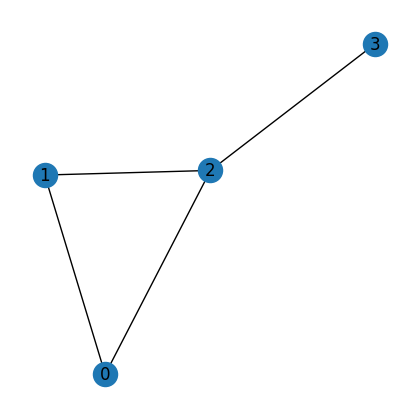

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
nx.draw(G, with_labels=True)
plt.show()

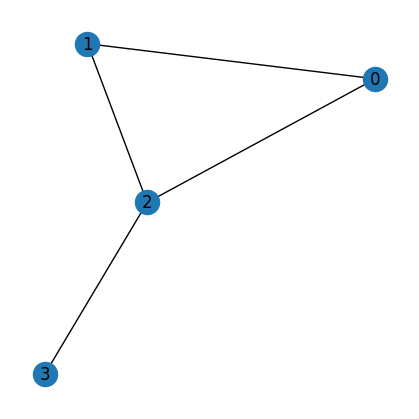

In [ ]:
from torch_geometric.utils import to_networkx

data_plt = to_networkx(data, to_undirected=True)
plt.figure(figsize=(4,4))
nx.draw(data_plt, with_labels=True)
plt.show()

To convert a `Data` object to a NetworkX graph object `G`, use `to_networkx`. To convert from `G` back to a `Data` object, use `from_networkx`.

### Building a GNN Model Using PyG

GNNs use specialized layers to process graph-structured data. One of the basic layers is `GCNConv` from PyTorch Geometric, which is based on the graph convolutional network (GCN) model.

#### Example: A Single GCN Layer

In [ ]:
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Create a GCN layer: converting 2 input features to 4 output features.
conv = GCNConv(in_channels=2, out_channels=4)

# A forward pass through the layer.
# Create dummy edge weights (optional; if not provided, defaults will be used)
edge_weight = torch.ones(data.edge_index.size(1))

# Pass the data through the layer
x_out = conv(data.x, data.edge_index, edge_weight)
print("GCN Layer Output:\n", x_out)

GCN Layer Output:
 tensor([[-0.9276, -0.0422, -0.2388, -0.7945],
        [-0.9276, -0.0422, -0.2388, -0.7945],
        [-1.1466, -0.0521, -0.2951, -0.9820],
        [-0.8288, -0.0377, -0.2133, -0.7098]], grad_fn=<AddBackward0>)


### Exploring More GNN Layers

Torch-Geometric comes with various GNN layers. Here are a few additional options:

* **GraphSAGE (`SAGEConv`):** Aggregates neighbor information by sampling and pooling.
* **GATConv:** Uses an attention mechanism on edges.
* **GraphConv:** Another variation on graph convolutions.

In [ ]:
from torch_geometric.nn import SAGEConv, GATConv, GraphConv

# Define layers converting from 2 input features to 4 output features.
sage_layer = SAGEConv(in_channels=2, out_channels=4)
gat_layer = GATConv(in_channels=2, out_channels=4, heads=2, concat=False)
graphconv_layer = GraphConv(in_channels=2, out_channels=4)

print("SAGE Layer Output:\n", sage_layer(data.x, data.edge_index))
print("GAT Layer Output:\n", gat_layer(data.x, data.edge_index))
print("GraphConv Layer Output:\n", graphconv_layer(data.x, data.edge_index))


SAGE Layer Output:
 tensor([[ 0.0166,  1.0215,  0.8836, -1.7568],
        [ 0.0166,  1.0215,  0.8836, -1.7568],
        [ 0.0166,  1.0215,  0.8836, -1.7568],
        [ 0.0166,  1.0215,  0.8836, -1.7568]], grad_fn=<AddBackward0>)
GAT Layer Output:
 tensor([[ 0.5022,  0.3370,  0.0884, -0.0804],
        [ 0.5022,  0.3370,  0.0884, -0.0804],
        [ 0.5022,  0.3370,  0.0884, -0.0804],
        [ 0.5022,  0.3370,  0.0884, -0.0804]], grad_fn=<AddBackward0>)
GraphConv Layer Output:
 tensor([[-0.5769,  0.3264,  1.9903, -0.2090],
        [-0.5769,  0.3264,  1.9903, -0.2090],
        [-0.6654,  0.8150,  2.5975, -0.7642],
        [-0.4884, -0.1622,  1.3831,  0.3461]], grad_fn=<AddBackward0>)


Each layer processes the graph slightly differently. Experimenting with these layers is an excellent way to understand how different architectures affect performance.

### Incorporating Normalization: GraphNorm

Normalization layers like `GraphNorm` can help stabilize training by normalizing the features across nodes for each graph.

In [ ]:
from torch_geometric.nn import GraphNorm

# Define a GraphNorm layer for 4-dimensional features.
gnorm = GraphNorm(in_channels=4)

# Apply GCN convolution first and then normalization.
x_gcn = conv(data.x, data.edge_index, edge_weight=None)
x_norm = gnorm(x_gcn)
print("After GraphNorm:\n", x_norm)

After GraphNorm:
 tensor([[ 0.2582,  0.2217,  0.2569,  0.2582],
        [ 0.2582,  0.2217,  0.2569,  0.2582],
        [-1.6239, -1.3941, -1.6155, -1.6237],
        [ 1.1075,  0.9508,  1.1018,  1.1074]], grad_fn=<AddBackward0>)


#### What If the Nodes Don’t Have Any Features?
Not all graphs come with node features. For example, many social or citation networks might only give you the graph structure—who connects to whom—but no additional data about the nodes. So what do we do?

🤔 Torch-Geometric (and GNNs in general) require node features to start the message-passing. If your nodes don’t have any features, one common trick is to use one-hot encodings based on the node index. This gives each node a unique identity.

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

# Create a graph with 4 nodes and some edges
edge_index = torch.tensor([
    [0, 1, 2, 3, 0, 2],
    [1, 0, 3, 2, 2, 0]
], dtype=torch.long)

# No node features!
# x = None or torch.empty(num_nodes, 0) will both fail in GCNConv

num_nodes = 4
# Let's try to use a dummy model
conv = GCNConv(in_channels=4, out_channels=2)

# Try 1: No node features (just pass None) – will raise an error!
try:
    x_none = None
    data = Data(x=x_none, edge_index=edge_index)
    out = conv(data.x, data.edge_index)
except Exception as e:
    print("❌ Failed without node features:", e)


❌ Failed without node features: 'NoneType' object has no attribute 'size'


##### Fix: Use One-Hot Encoding for Node Indices


In [ ]:
# Use one-hot encoding for node IDs
x_onehot = torch.eye(num_nodes)

data = Data(x=x_onehot, edge_index=edge_index)
out = conv(data.x, data.edge_index)

print("✅ Output with one-hot features:\n", out)


✅ Output with one-hot features:
 tensor([[ 0.6207,  0.4912],
        [ 0.3753,  0.7643],
        [-0.0687,  0.3822],
        [-0.0725,  0.1324]], grad_fn=<AddBackward0>)


But in larger graphs, one-hot encoding could be inefficient in terms of memory; in such cases, learnable embeddings indexed by node IDs may be preferable.

### A Simple Training Loop for Node Classification

Let’s put together a small GNN model and demonstrate training for a node classification task. We’ll use train and validation masks to focus on subsets of nodes for training and evaluation.

#### Example: Defining the Model and Training Loop

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import networkx as nx
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch_geometric.utils import from_networkx

# Step 1: Create a simple graph (star graph with 5 nodes)
G = nx.star_graph(4)  # Central node 0, connected to 1, 2, 3, 4
data = from_networkx(G)

# Step 2: Add node features and labels
data.x = torch.ones(data.num_nodes, 2)  # 2D feature vector [1, 1] for each node
data.y = torch.tensor([0, 1, 1, 1, 1], dtype=torch.float)  # Central node: 0, others: 1

# Step 3: Create train and validation masks
num_nodes = data.num_nodes
indices = np.random.permutation(num_nodes)
train_idx, val_idx = indices[:2], indices[2:]  # 2 nodes for train, 3 for val
data.train_mask = torch.zeros(num_nodes, dtype=torch.bool)
data.val_mask = torch.zeros(num_nodes, dtype=torch.bool)
data.train_mask[train_idx] = True
data.val_mask[val_idx] = True

# Step 4: Define the GCN model
class SimpleGCN(nn.Module):
    def __init__(self):
        super(SimpleGCN, self).__init__()
        self.conv1 = GCNConv(in_channels=2, out_channels=16)  # Input: 2D features (why 2D? because our node has 2 input features)
        self.conv2 = GCNConv(in_channels=16, out_channels=8)
        self.linear= nn.Linear(in_features=8, out_features=1) # Output: 1D logits (why 1D? because we are going to pass it into a sigmoid function, which requires a single output value per node for binary classification)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = self.linear(x)
        return x  # Raw logits

# Step 5: Initialize model, optimizer, and loss
model = SimpleGCN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

# Step 6: Training function
def train():
    model.train()
    optimizer.zero_grad()
    logits = model(data)  # Shape: [num_nodes, 1]
    # Compute loss only on training nodes
    loss = criterion(logits[data.train_mask], data.y[data.train_mask].unsqueeze(1))
    loss.backward()
    optimizer.step()
    return loss.item()

# Step 7: Training loop
for epoch in range(1, 101):
    loss = train()
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

# Step 8: Evaluation function
def evaluate(mask):
    model.eval()
    with torch.no_grad():
        logits = model(data)
        probs = torch.sigmoid(logits)
        pred = (probs > 0.5).float()
        correct = (pred[mask] == data.y[mask].unsqueeze(1)).sum().item()
        acc = correct / mask.sum().item()
    return acc

# Step 9: Evaluate on validation set
val_acc = evaluate(data.val_mask)
print(f'Validation Accuracy: {val_acc:.4f}')

Epoch 20, Loss: 0.6333
Epoch 40, Loss: 0.5265
Epoch 60, Loss: 0.4140
Epoch 80, Loss: 0.3027
Epoch 100, Loss: 0.2061
Validation Accuracy: 0.6667


As you can see here, we use a mask to split the graph’s nodes into training, validation sets, ensuring the model learns from some nodes and is evaluated on others for generalization. Without a mask, the model trains and evaluates on all nodes, risking overfitting and providing no measure of performance on unseen data.

# Dataset for Your Assignment (Zachary Karate Club Network)

In [ ]:
data = nx.karate_club_graph()